In [1]:
import numpy as np
from tensorflow import keras
print (keras.__version__)


2.8.0


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
from collections import Counter
Counter(y_train)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [5]:
X_train_final = X_train.reshape(-1,784)
X_train_final.shape

(60000, 784)

In [6]:
X_test_final = X_test.reshape(-1,784)
X_test_final.shape

(10000, 784)

In [7]:
X_train_final = X_train_final / 255
X_test_final = X_test_final / 255

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape= (784,), activation = 'softmax'))
# model.add(keras.layers.Dense(1, input_shape= (784,), activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [11]:
results = model.fit(
    x = X_train_final,
    y = y_train,
    shuffle = True,
    epochs = 30,
    batch_size = 16,
    validation_data = (X_test_final, y_test)
)

Epoch 1/30
3750/3750 [==============================] - 16s 3ms/step - loss: 0.6174 - accuracy: 0.8478 - val_loss: 0.4020 - val_accuracy: 0.8959
Epoch 2/30
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3931 - accuracy: 0.8927 - val_loss: 0.3505 - val_accuracy: 0.9057
Epoch 3/30
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3569 - accuracy: 0.9011 - val_loss: 0.3272 - val_accuracy: 0.9106
Epoch 4/30
3750/3750 [==============================] - 11s 3ms/step - loss: 0.3380 - accuracy: 0.9061 - val_loss: 0.3156 - val_accuracy: 0.9127
Epoch 5/30
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3258 - accuracy: 0.9096 - val_loss: 0.3079 - val_accuracy: 0.9144
Epoch 6/30
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3175 - accuracy: 0.9116 - val_loss: 0.3003 - val_accuracy: 0.9158
Epoch 7/30
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3107 - accuracy: 0.9131 - val_loss: 0.2963 - val_ac

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Losses')

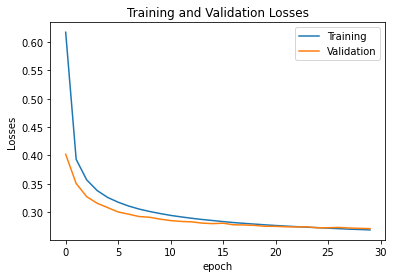

In [13]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')


Text(0, 0.5, 'accuarcy')

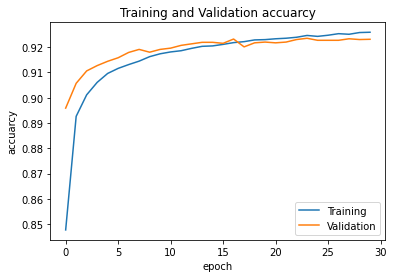

In [14]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuarcy')


In [15]:
# plt.plot(results.history['binary_accuracy'])
# plt.plot(results.history['binary_val_accuracy'])
# plt.legend(['Training', 'Validation'])
# plt.title('Training and Validation accuarcy')
# plt.xlabel('epoch')
# plt.ylabel('accuarcy')
